# Linear Regression Project Exercise 

Your goal will be to create a Linear Regression Model, train it on the data with the optimal parameters using a grid search, and then evaluate the model's capabilities on a test set.

## Complete the tasks in bold

**TASK: Run the cells under the Imports and Data section to make sure you have imported the correct general libraries as well as the correct datasets. Later on you may need to run further imports from scikit-learn.**

#### Task: Import required packages.

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import missingno as msno
pd.set_option("display.max_rows",None)
pd.options.mode.chained_assignment = None

#### Describe your Data

In [2]:
df = pd.read_csv("Ames_Housing_Data.csv")

In [3]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

In [5]:
df.describe()

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,2929.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,442.629566,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,455.590839,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,734.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


#### Drop ID column

In [6]:
df.drop(['PID'], axis = 1, inplace = True)

#### **Task Check if there are any duplicated data in our dataset.**

In [7]:
if df.duplicated().any()== True:
    print("There are duplicated values in this dataset")
    print(f"There are {df.duplicated().sum()} consistent duplicated values in this dataset.")
else:
    print("There aren't duplicated values in this dataset")

There aren't duplicated values in this dataset


In [8]:
#drop duplicated values and keep the first occurance
df = df.drop_duplicates(keep='first') if df.duplicated().any() == True else df

#### Create helper functions.

In [9]:
def check_missing_presentage(df):
    total_miss = df.isnull().sum()
    columns_dtype = []
    for column in df.columns:
        columns_dtype.append(df[column].dtype)
    percent_miss = (total_miss/df.isnull().count()*100)

    # sort attributes by missing value ratio
    missing_data_stat = pd.DataFrame({'Total missing':total_miss,'% missing':percent_miss, 'Column data type': columns_dtype})
    #analyzing missing data
    #bar chart
    msno.bar(df)

    #visualize missing values as a matrix
    msno.matrix(df)

    # The above correlation visualization is based on the following steps, you can consider them if you want to access to a matrix showing the missing value status of each attribute for each record.
    df_ismissing = df.iloc[:, [i for i, n in enumerate(np.var(df.isnull(), axis='rows')) if n > 0]].isnull()
    return missing_data_stat.sort_values(by='Total missing',ascending=False) ,df_ismissing.corr()

In [10]:
def check_and_handle_outliers(data):

    numerical_columns = list(data.select_dtypes(include=['int','float']))
    numerical_columns.remove('SalePrice')
    for i, column in enumerate(numerical_columns):
        
        Q1 = np.percentile(data[column], 25,
                        method = 'midpoint')
        
        Q3 = np.percentile(data[column], 75,
                        method = 'midpoint')
        IQR = Q3 - Q1
        
        # Upper bound
        upper_bound = np.where(data[column] > (Q3+1.5*IQR))
        # Lower bound
        lower_bound = np.where(data[column] < (Q1-1.5*IQR))

        num_of_outliers = len(upper_bound[0]) + len(lower_bound[0])
        
        print(f"number of outliers at '{column} feature is: {num_of_outliers} value.")

        ''' Removing the Outliers '''
        percentiles = data[column].quantile([0.25,0.75]).values
        data[column][data[column] <= percentiles[0]] = percentiles[0]
        data[column][data[column] >= percentiles[1]] = percentiles[1]

        plt.clf()
        data.reset_index(drop=True, inplace=True)    
    return data

#### **Task handle the outliers of numerical features.**

we'll handle the outliers before handling the missing values because I want to to fill the missing values of the numerical features with the mean and the mean is not robust to the outliers so I will remove the outliers at first and then I'll handle the missing values of the numerical features with the mean.

note:- if I want to fill the missing values of the numerical features with the median, I don't need to remove the outliers since the median value is robust to the outliers.

[Text(0.5, 1.0, " 'Enclosed Porch' feature with outliers")]

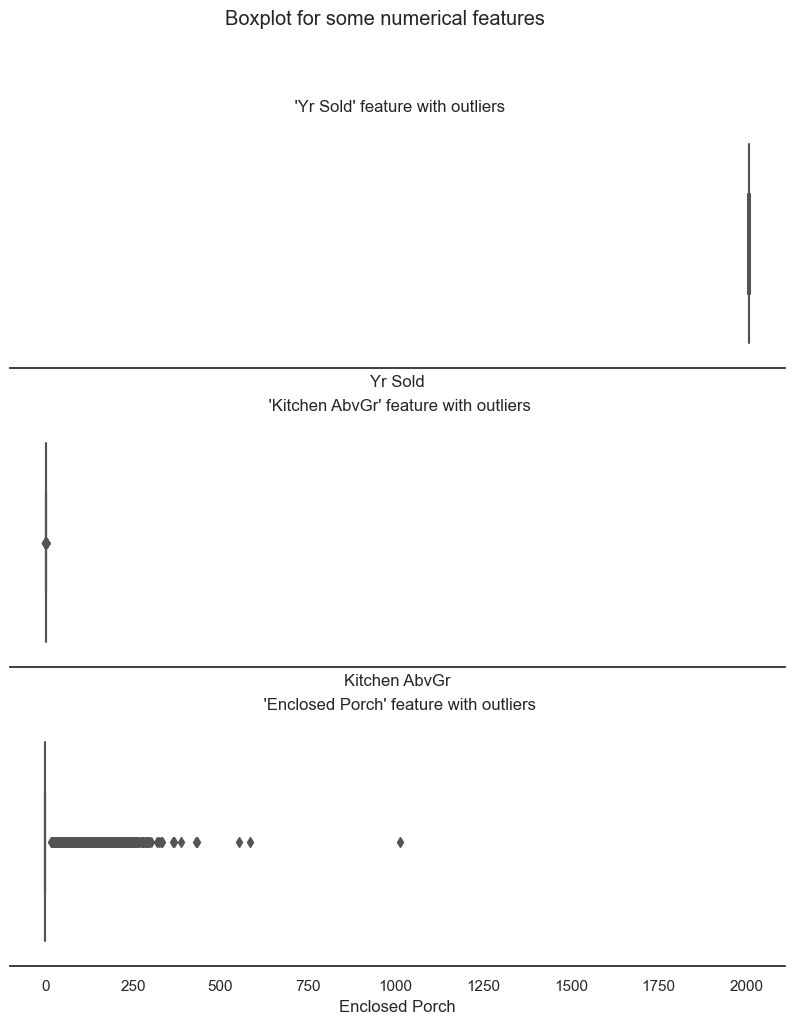

In [11]:
sns.set(style="white", palette="muted", color_codes=True)
rs = np.random.RandomState(10)

# Set up the matplotlib figure
f, axes = plt.subplots(3, 1, figsize=(10, 11), sharex=True)
sns.despine(left=True)
f.suptitle('Boxplot for some numerical features')
sns.boxplot(x=df['Yr Sold'], ax=axes[0])
axes[0].set(title = f" 'Yr Sold' feature with outliers")
sns.boxplot(x=df['Kitchen AbvGr'], ax=axes[1])
axes[1].set(title = f" 'Kitchen AbvGr' feature with outliers")
sns.boxplot(x=df['Enclosed Porch'], ax=axes[2])
axes[2].set(title = f" 'Enclosed Porch' feature with outliers")

In [12]:
df = check_and_handle_outliers(df)

number of outliers at 'MS SubClass feature is: 208 value.
number of outliers at 'Lot Frontage feature is: 0 value.
number of outliers at 'Lot Area feature is: 127 value.
number of outliers at 'Overall Qual feature is: 4 value.
number of outliers at 'Overall Cond feature is: 252 value.
number of outliers at 'Year Built feature is: 9 value.
number of outliers at 'Year Remod/Add feature is: 0 value.
number of outliers at 'Mas Vnr Area feature is: 0 value.
number of outliers at 'BsmtFin SF 1 feature is: 0 value.
number of outliers at 'BsmtFin SF 2 feature is: 0 value.
number of outliers at 'Bsmt Unf SF feature is: 0 value.
number of outliers at 'Total Bsmt SF feature is: 0 value.
number of outliers at '1st Flr SF feature is: 43 value.
number of outliers at '2nd Flr SF feature is: 8 value.
number of outliers at 'Low Qual Fin SF feature is: 40 value.
number of outliers at 'Gr Liv Area feature is: 75 value.
number of outliers at 'Bsmt Full Bath feature is: 0 value.
number of outliers at 'Bsmt

<Figure size 640x480 with 0 Axes>

[Text(0.5, 1.0, " 'Yr Sold' feature without outliers")]

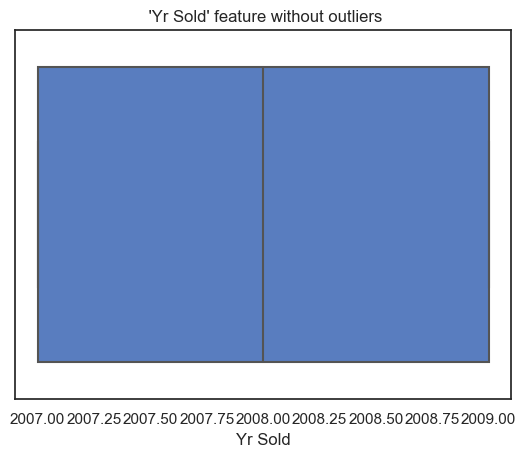

In [13]:
none_outlier = sns.boxplot(x=df['Yr Sold'])
none_outlier.set(title = f" 'Yr Sold' feature without outliers")

,Total missing,% missing,Column data type
Pool QC,2917,99.556314,object
Misc Feature,2824,96.382253,object
Alley,2732,93.242321,object
Fence,2358,80.477816,object
Fireplace Qu,1422,48.532423,object
Lot Frontage,490,16.723549,float64
Garage Cond,159,5.426621,object
Garage Finish,159,5.426621,object
Garage Yr Blt,159,5.426621,float64
Garage Qual,159,5.426621,object


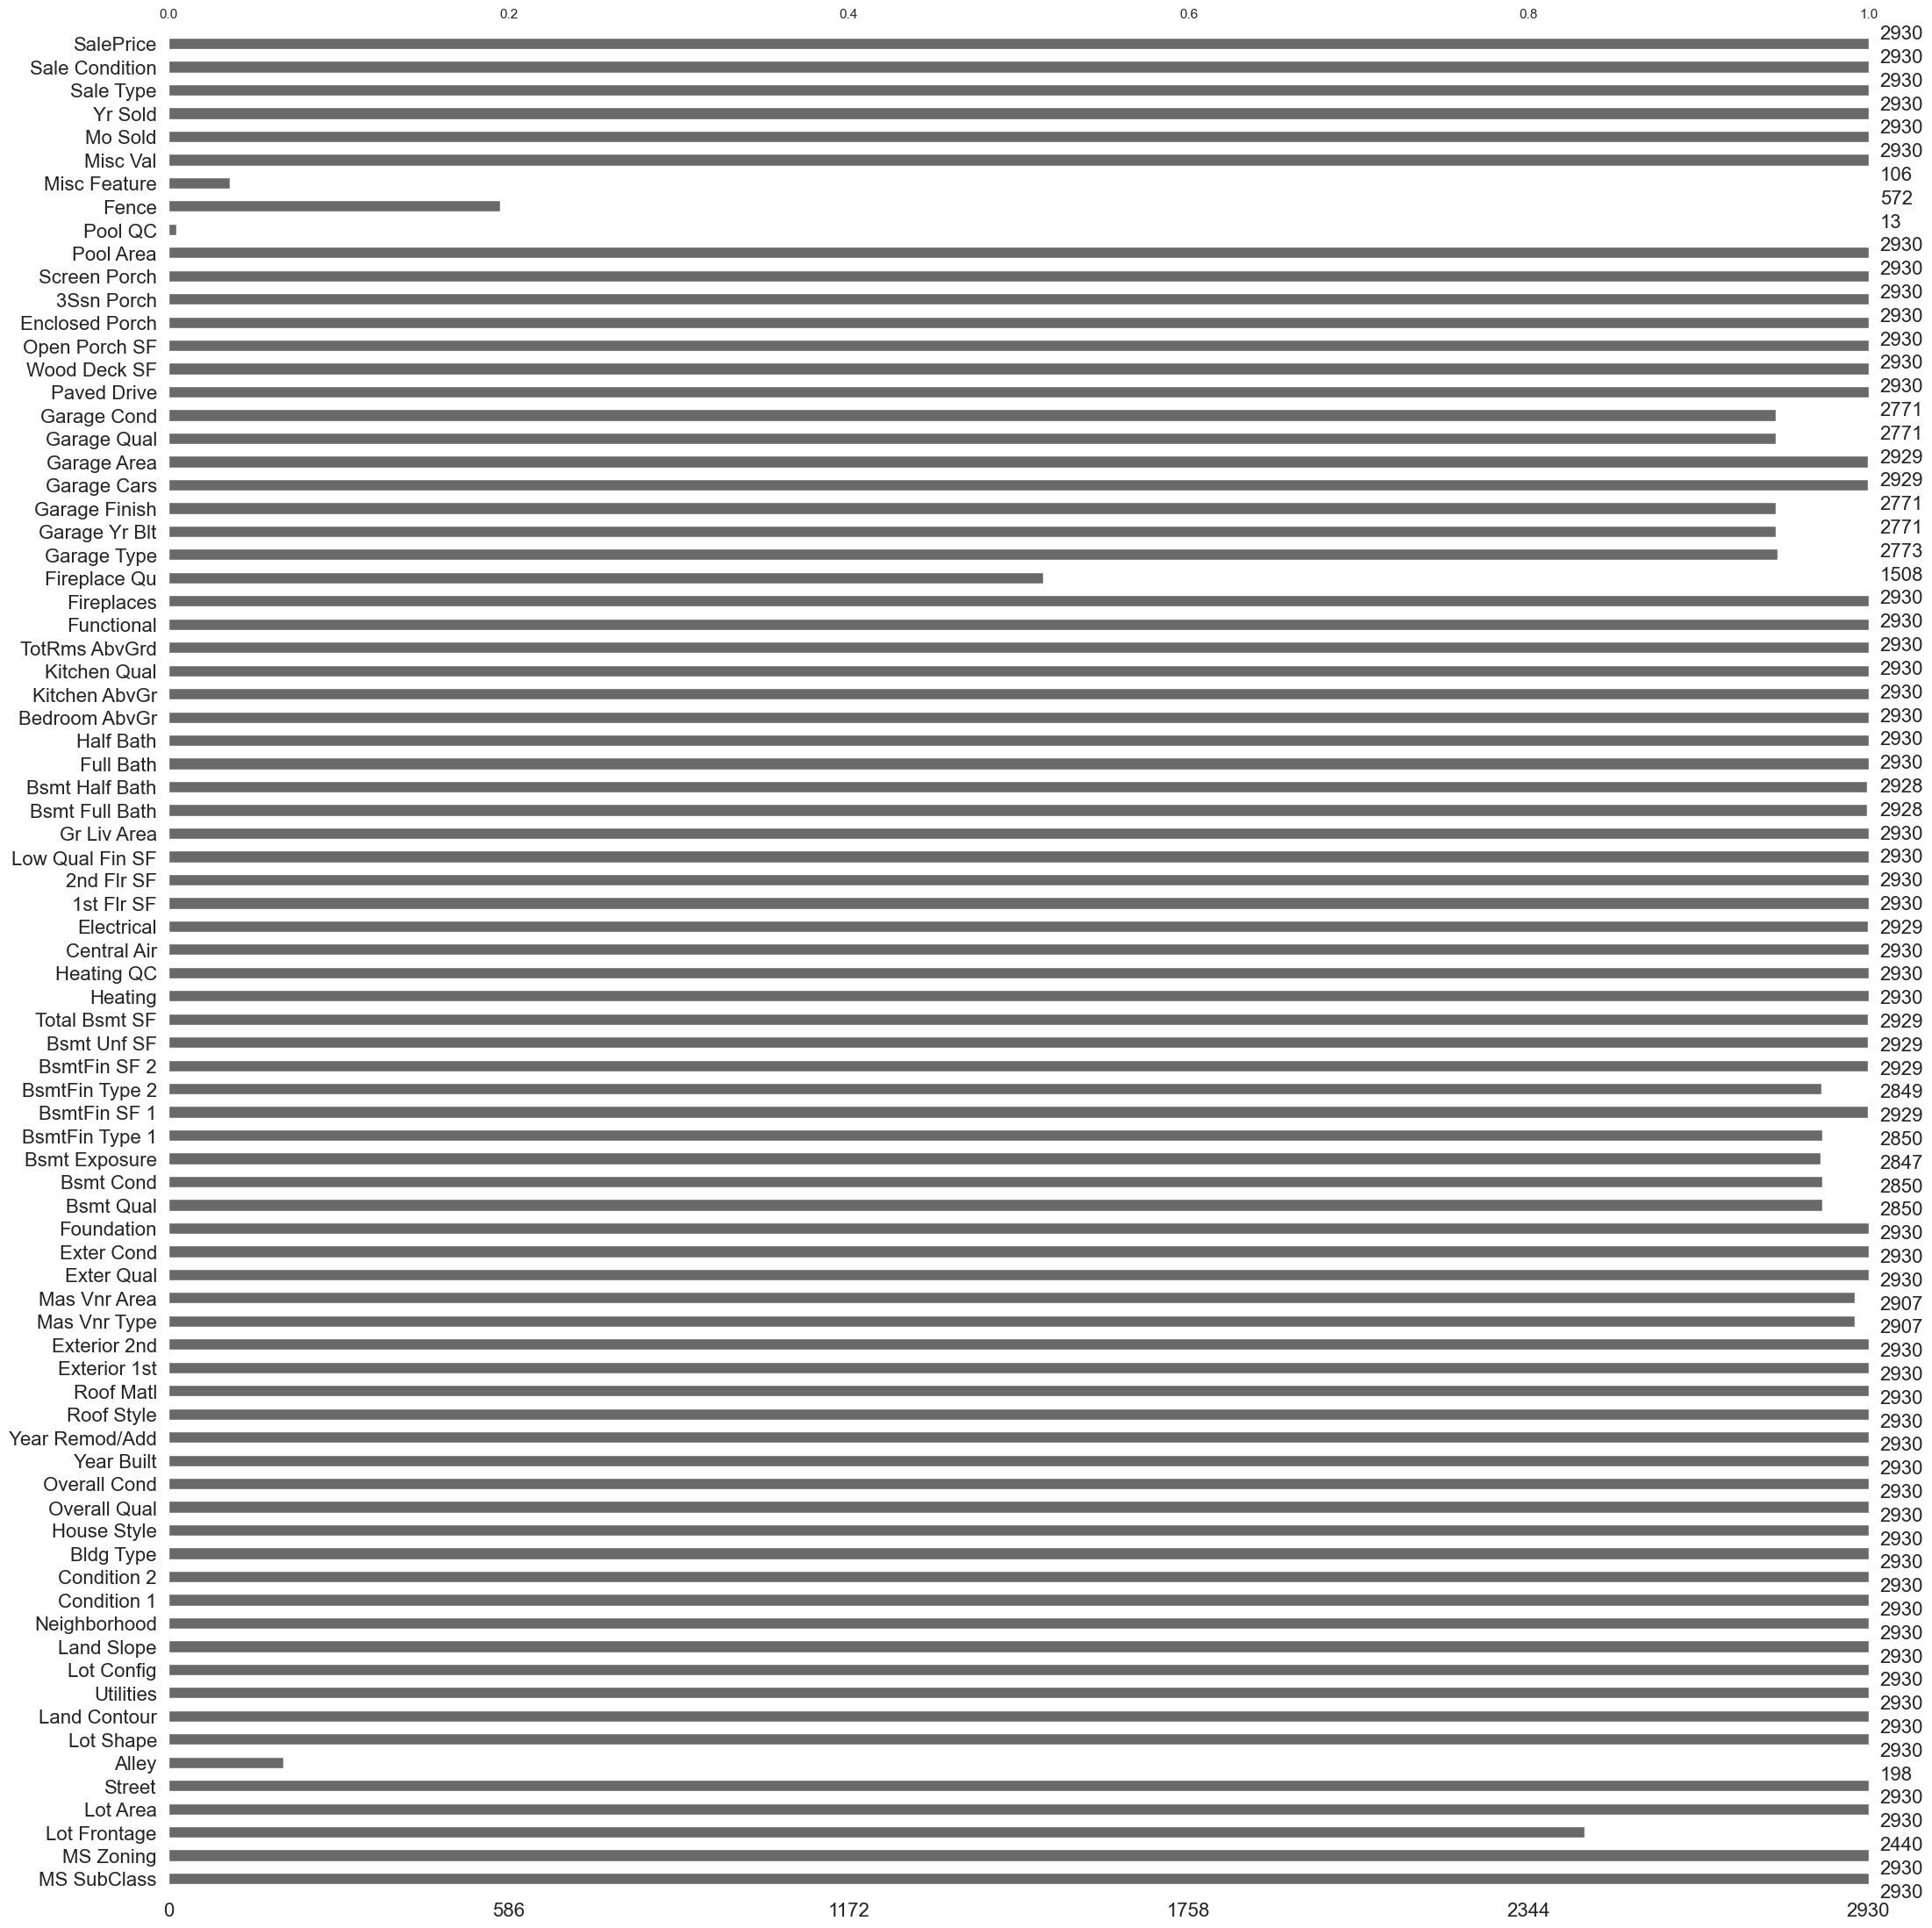

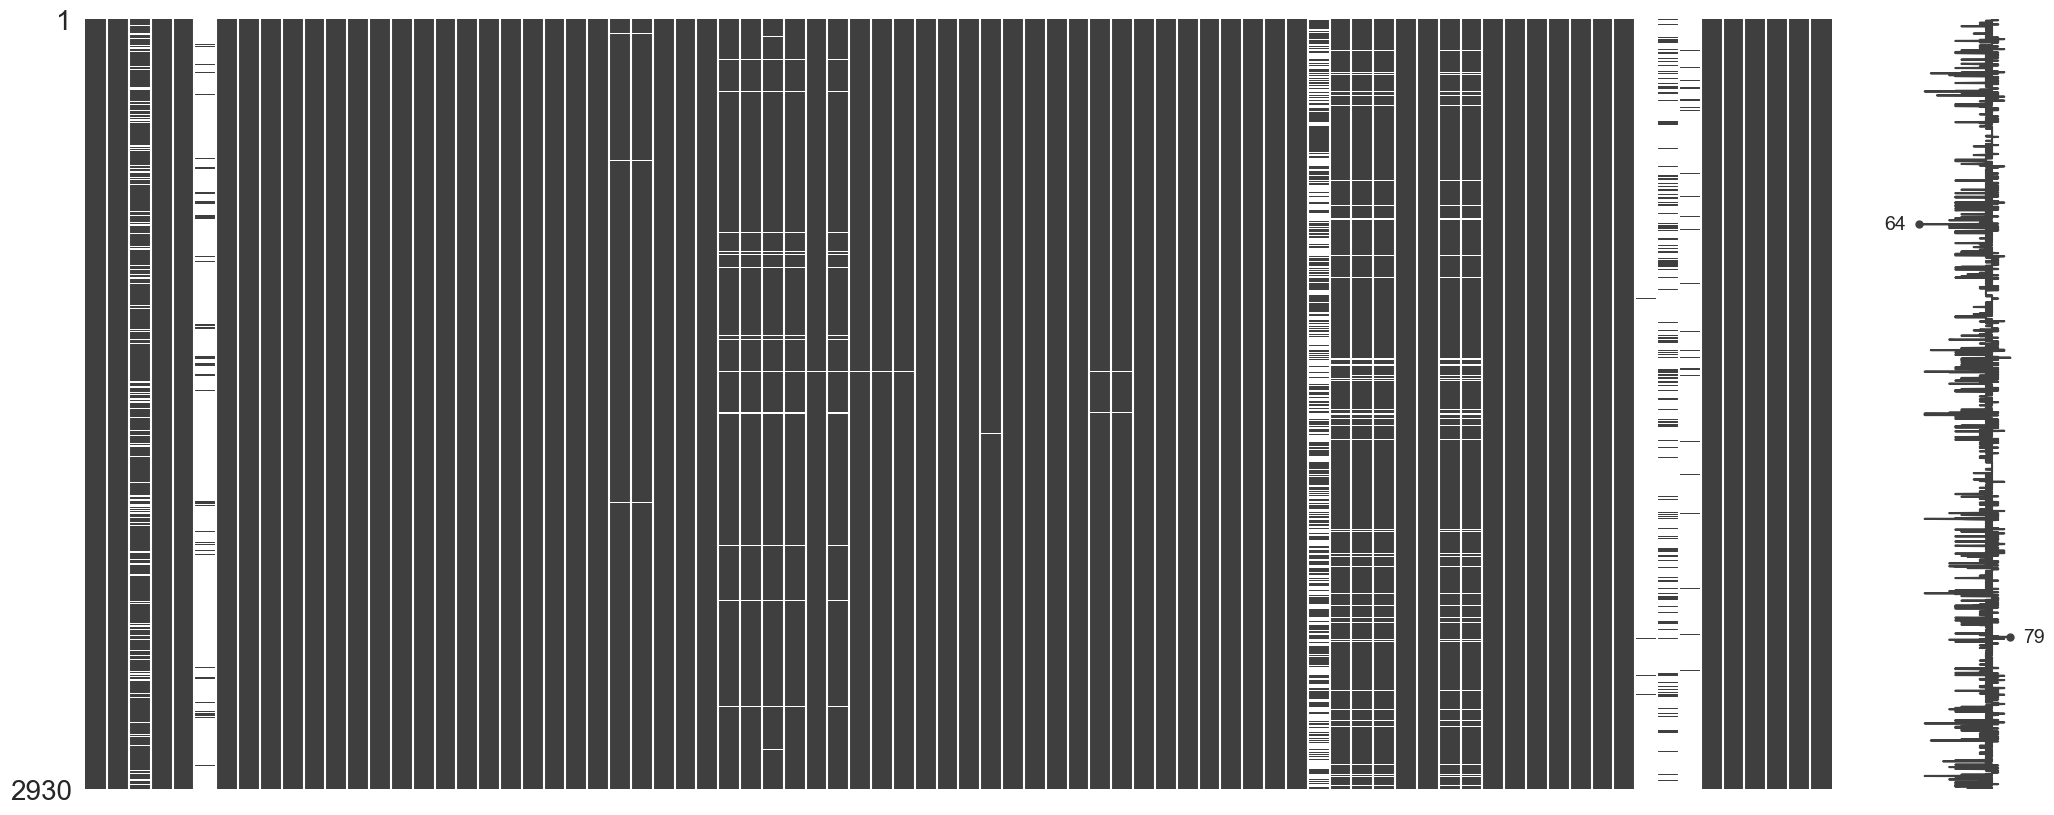

In [14]:
missing_data_stat, missing_corr = check_missing_presentage(df)
missing_data_stat

In [15]:
missing_corr

,Lot Frontage,Alley,Mas Vnr Type,Mas Vnr Area,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,...,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Pool QC,Fence,Misc Feature
Lot Frontage,1.000000,0.073277,0.022318,0.022318,0.003486,0.003486,0.000658,0.003486,-0.008280,0.002532,...,-0.061957,-0.062938,-0.062938,-0.008280,-0.008280,-0.062938,-0.062938,0.016156,-0.012324,-0.030723
Alley,0.073277,1.000000,-0.006867,-0.006867,0.028418,0.028418,0.029576,0.028418,0.004974,0.028807,...,-0.062734,-0.067551,-0.067551,0.004974,0.004974,-0.067551,-0.067551,-0.017972,-0.012534,0.006093
Mas Vnr Type,0.022318,-0.006867,1.000000,1.000000,-0.014903,-0.014903,-0.015188,-0.014903,-0.001644,-0.014998,...,-0.003991,-0.004236,-0.004236,-0.001644,-0.001644,-0.004236,-0.004236,0.005938,0.043809,0.017233
Mas Vnr Area,0.022318,-0.006867,1.000000,1.000000,-0.014903,-0.014903,-0.015188,-0.014903,-0.001644,-0.014998,...,-0.003991,-0.004236,-0.004236,-0.001644,-0.001644,-0.004236,-0.004236,0.005938,0.043809,0.017233
Bsmt Qual,0.003486,0.028418,-0.014903,-0.014903,1.000000,1.000000,0.981245,1.000000,0.110285,0.993634,...,0.090332,0.089290,0.089290,-0.003096,-0.003096,0.089290,0.089290,-0.020326,0.029682,-0.023617
Bsmt Cond,0.003486,0.028418,-0.014903,-0.014903,1.000000,1.000000,0.981245,1.000000,0.110285,0.993634,...,0.090332,0.089290,0.089290,-0.003096,-0.003096,0.089290,0.089290,-0.020326,0.029682,-0.023617
Bsmt Exposure,0.000658,0.029576,-0.015188,-0.015188,0.981245,0.981245,1.000000,0.981245,0.108217,0.974984,...,0.087263,0.086229,0.086229,-0.003155,-0.003155,0.086229,0.086229,-0.019554,0.032196,-0.022003
BsmtFin Type 1,0.003486,0.028418,-0.014903,-0.014903,1.000000,1.000000,0.981245,1.000000,0.110285,0.993634,...,0.090332,0.089290,0.089290,-0.003096,-0.003096,0.089290,0.089290,-0.020326,0.029682,-0.023617
BsmtFin SF 1,-0.008280,0.004974,-0.001644,-0.001644,0.110285,0.110285,0.108217,0.110285,1.000000,0.109583,...,-0.004397,-0.004426,-0.004426,-0.000341,-0.000341,-0.004426,-0.004426,0.001234,-0.037516,0.003580
BsmtFin Type 2,0.002532,0.028807,-0.014998,-0.014998,0.993634,0.993634,0.974984,0.993634,0.109583,1.000000,...,0.089293,0.088254,0.088254,-0.003116,-0.003116,0.088254,0.088254,-0.020065,0.030529,-0.023072


#### **Task Handle the missing values in numerical features.**

In [16]:
df = df.loc[:, df.isnull().mean() < .7]

In [17]:
numerical_columns = list(df.select_dtypes(include=['int','float']))
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

#### **Task Handle the missing values in object features.**

**TASK: Visulaze the frequency of values in each object feature**

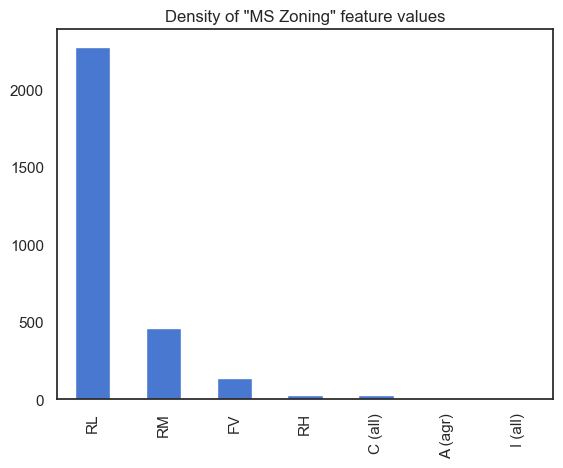

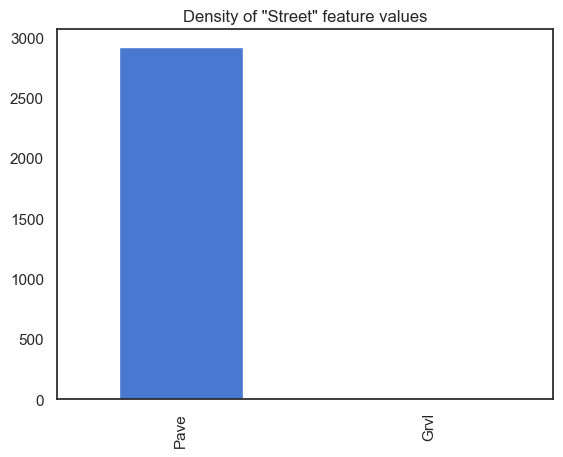

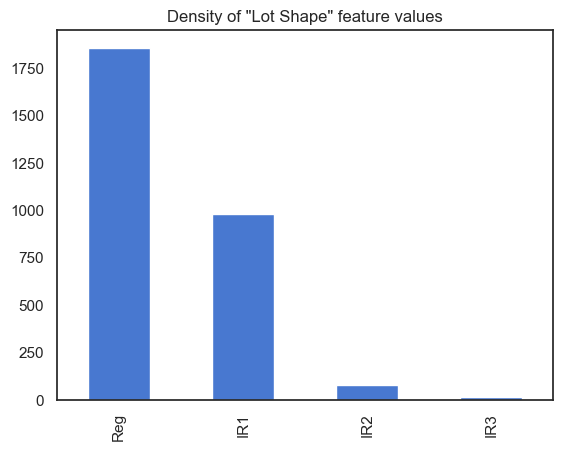

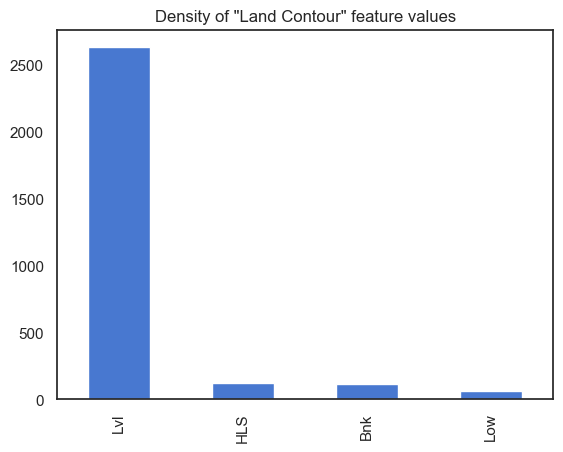

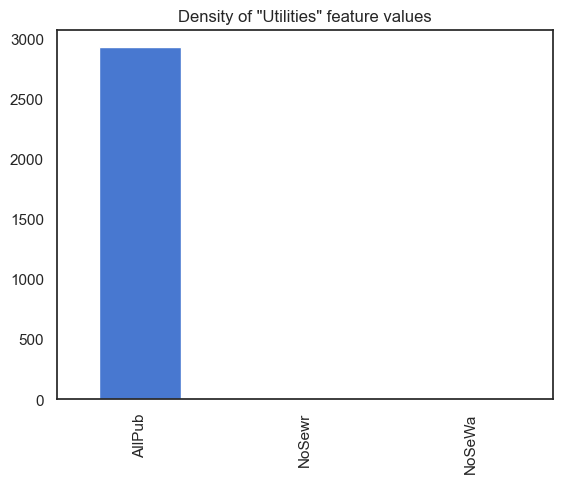

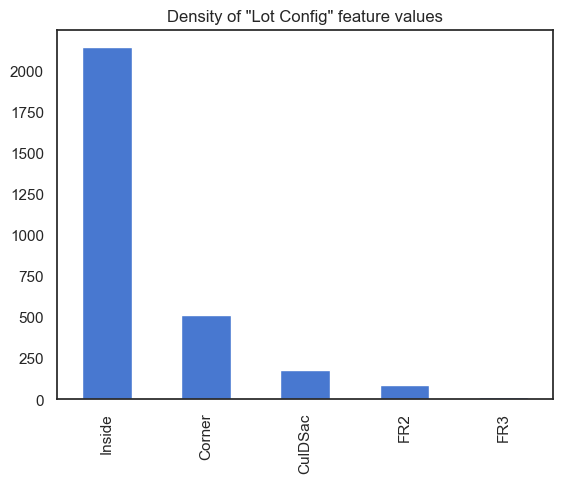

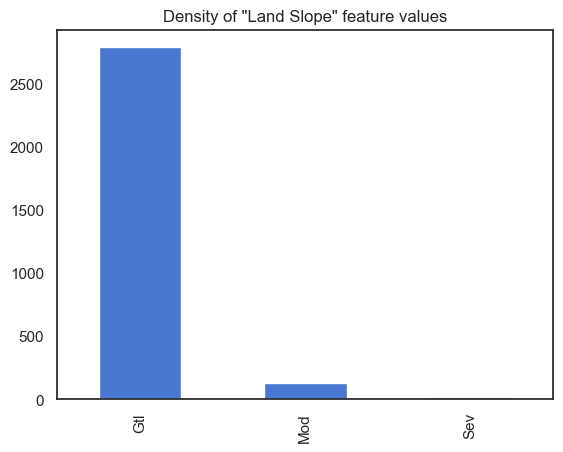

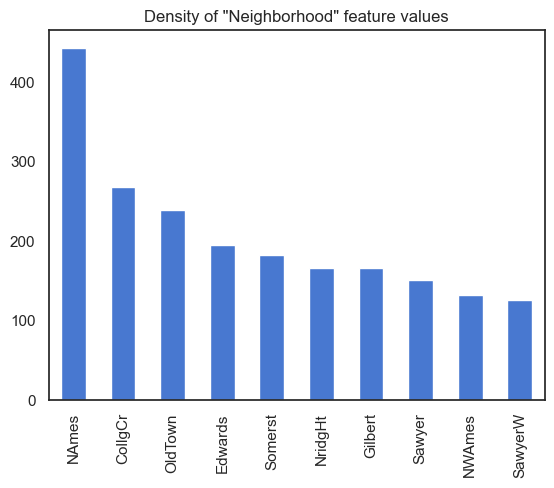

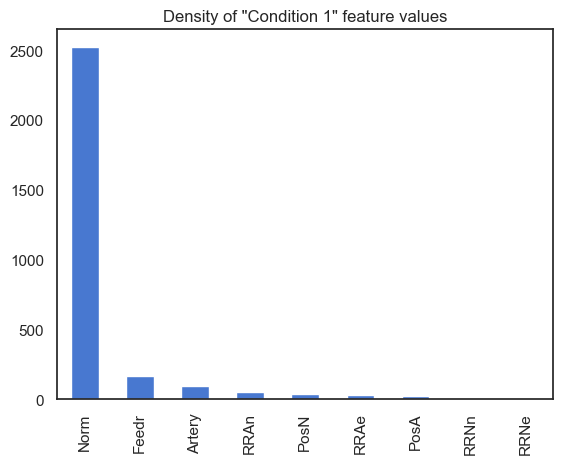

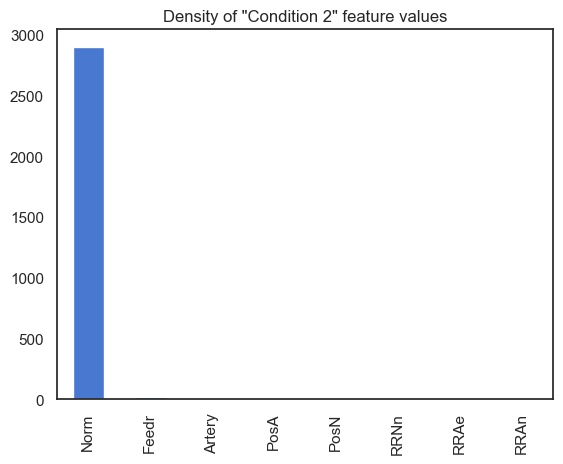

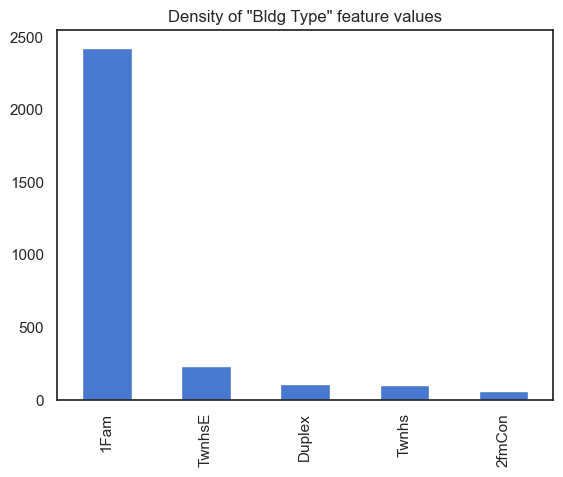

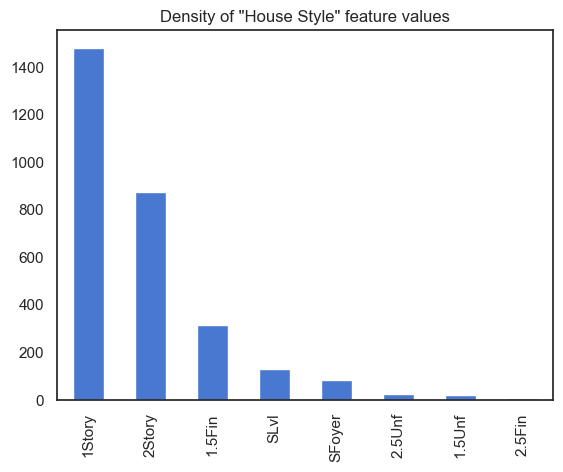

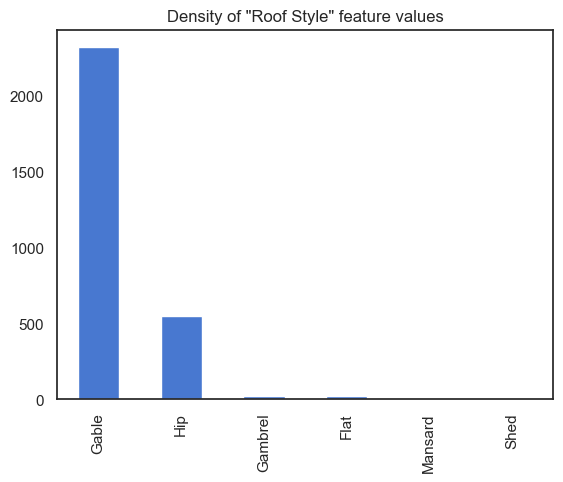

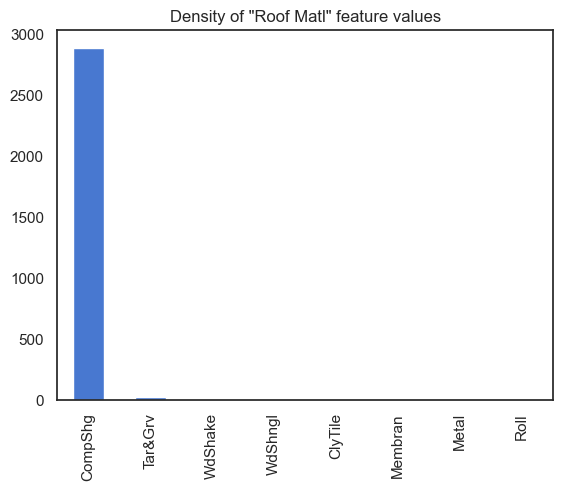

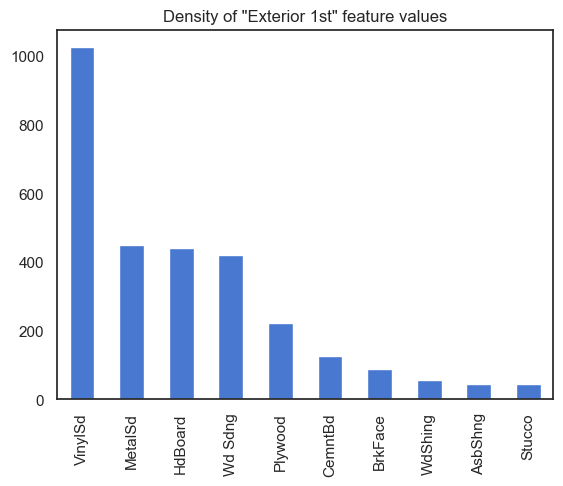

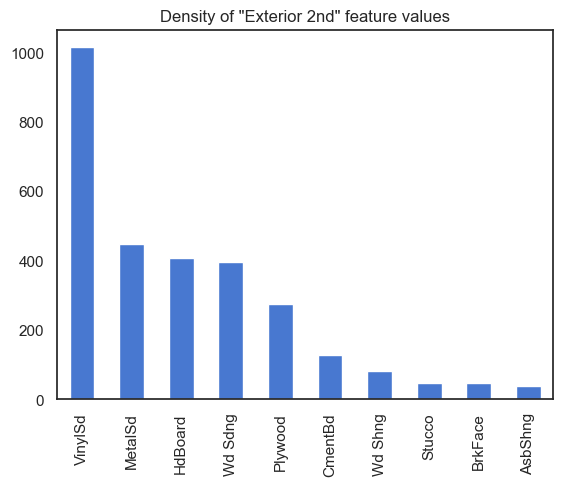

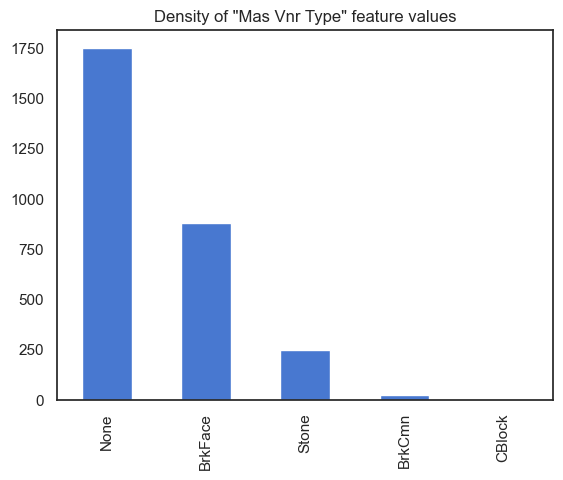

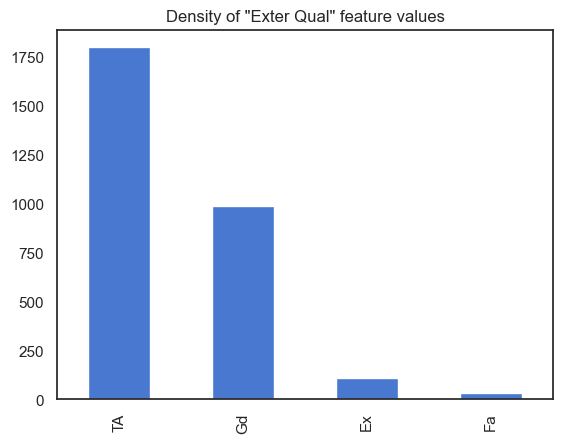

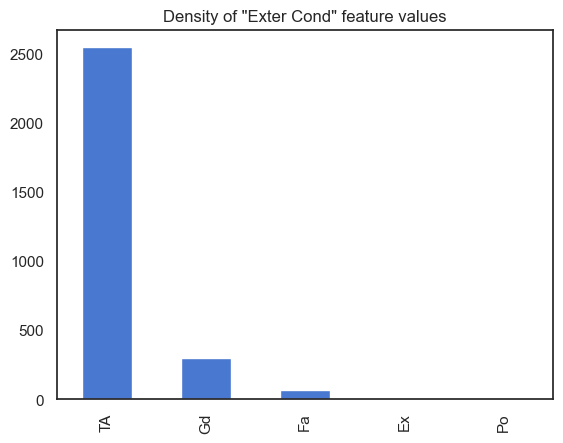

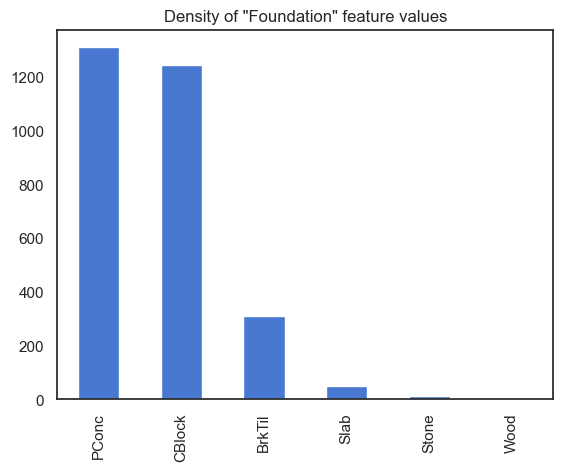

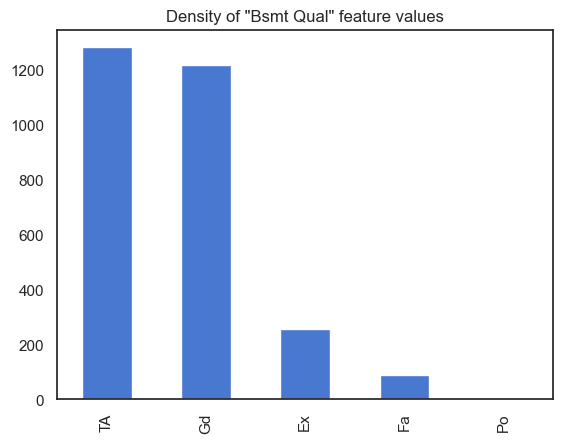

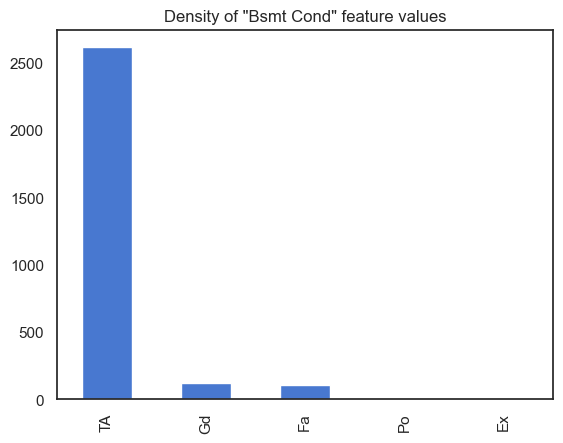

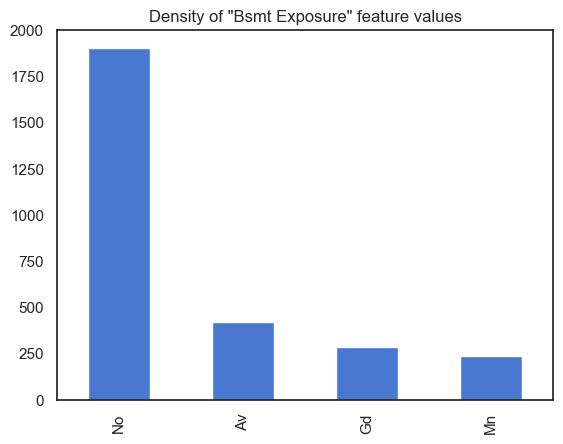

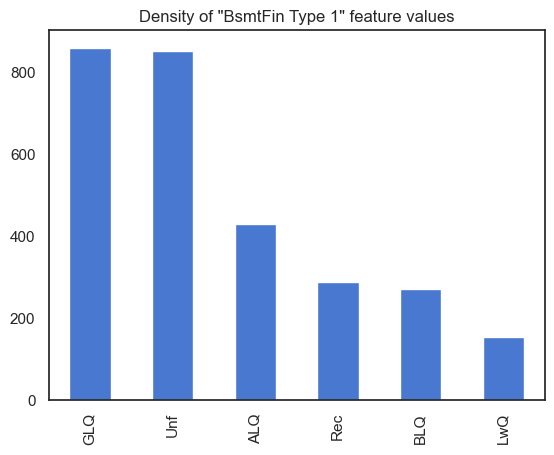

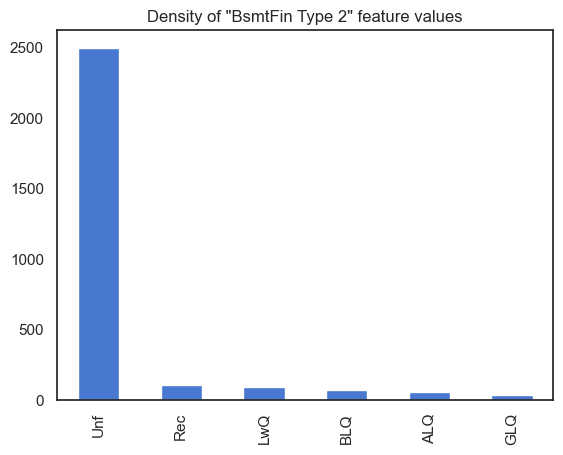

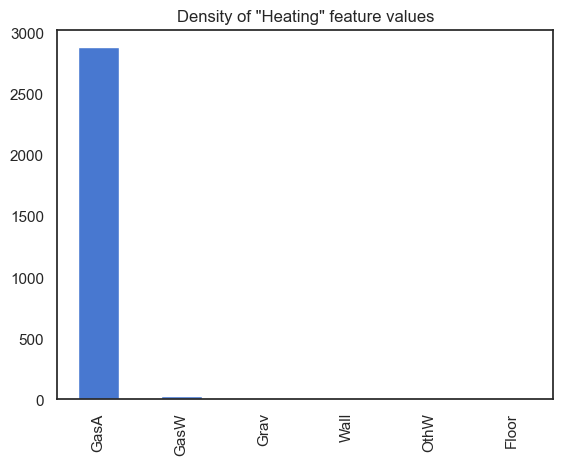

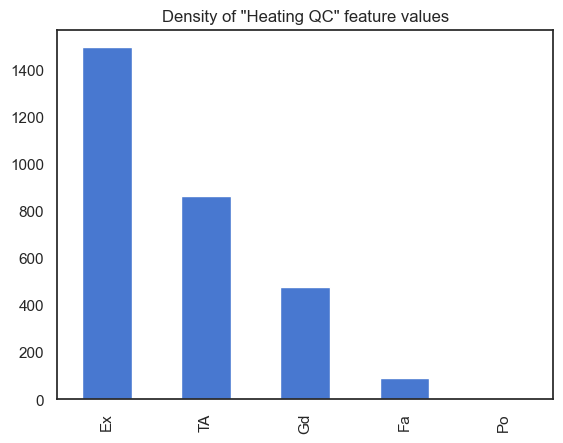

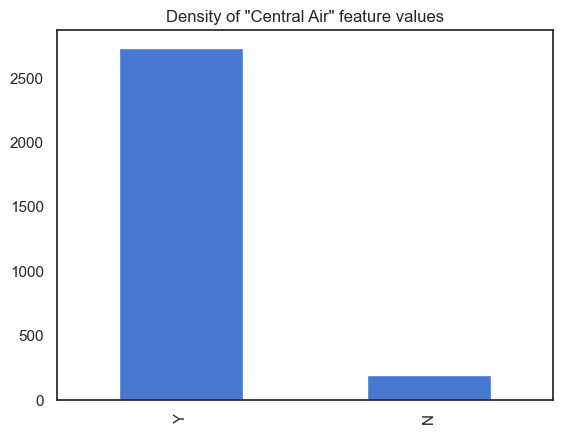

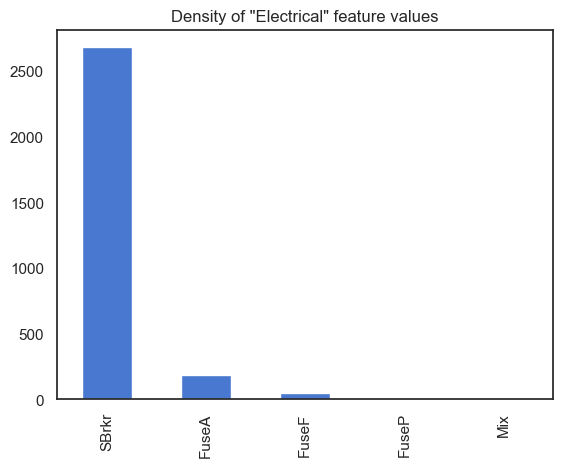

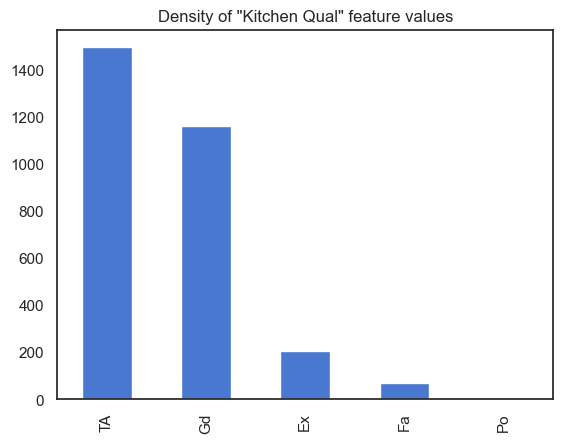

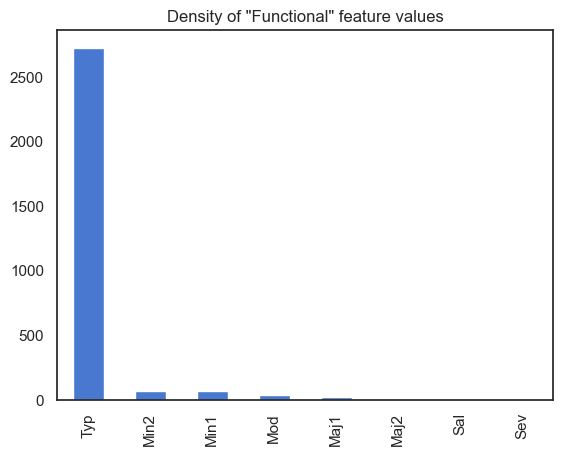

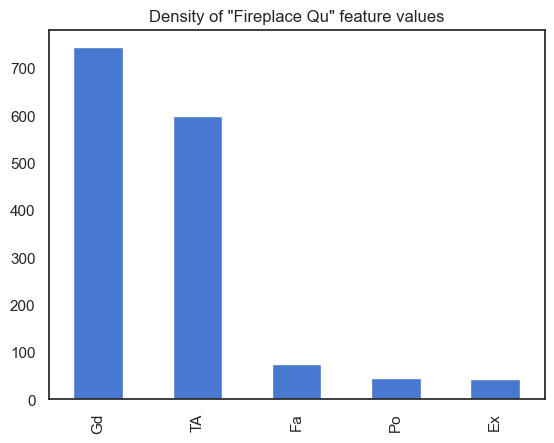

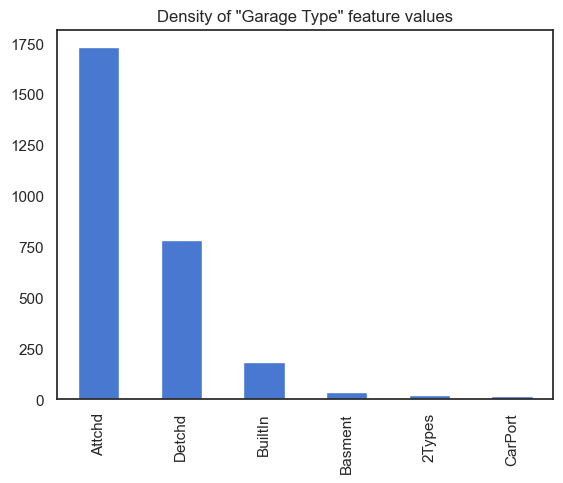

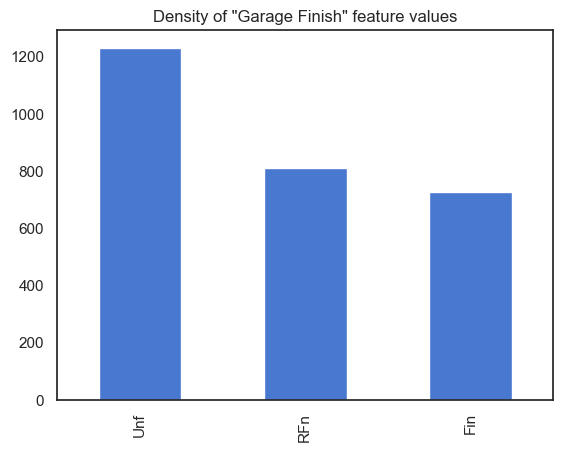

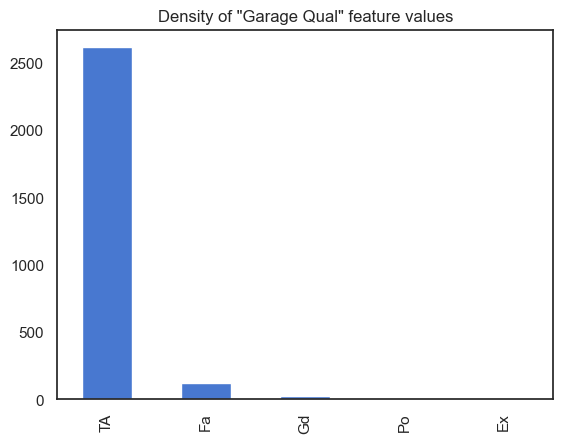

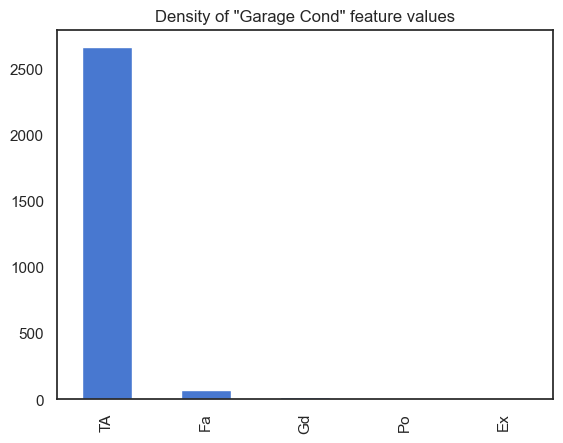

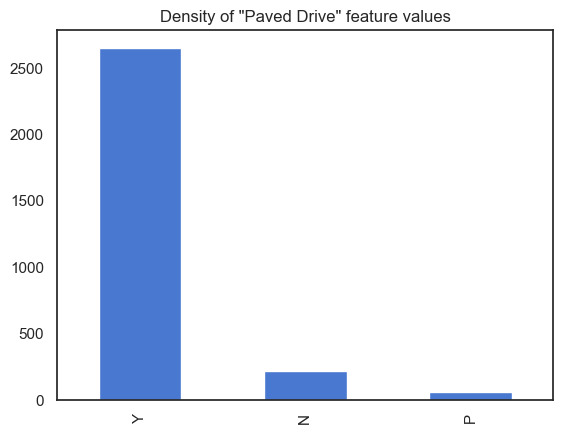

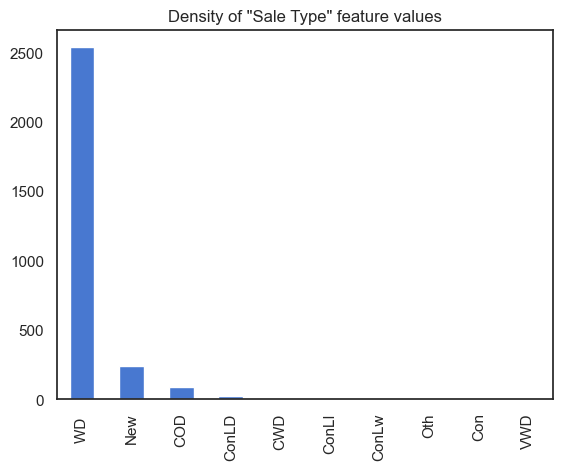

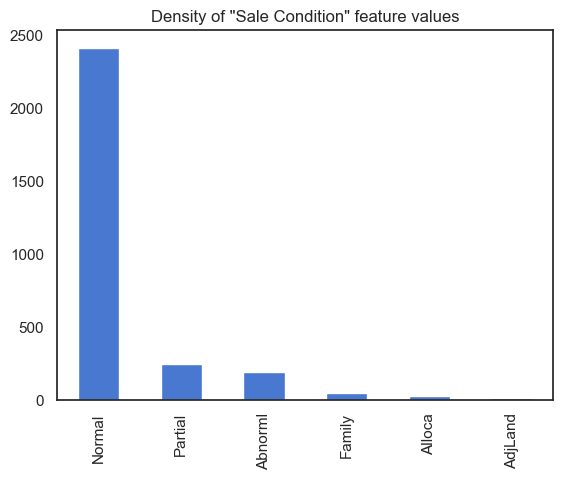

In [18]:
obj_columns = list(df.select_dtypes(include=['object']))
for column in obj_columns:
    df[column] = df[column].astype('category')
    ax = df[column].value_counts()[:10].plot(kind='bar', title=f'Density of "{column}" feature values')
    fig = ax.get_figure()
    plt.show(block=False)
    plt.close(fig)

In [19]:
categorical_columns = list(df.select_dtypes(include=['category']))
for column in categorical_columns:
    df[column] = df[column].fillna(df[column].mode()[0])

In [20]:
total_miss = df.isnull().sum()
columns_dtype = []
for column in df.columns:
    columns_dtype.append(df[column].dtype)
percent_miss = (total_miss/df.isnull().count()*100)

# sort attributes by missing value ratio
missing_data_stat = pd.DataFrame({'Total missing':total_miss,'% missing':percent_miss, 'Column data type': columns_dtype})
missing_data_stat.sort_values(by='Total missing',ascending=False)

,Total missing,% missing,Column data type
MS SubClass,0,0.0,int64
Half Bath,0,0.0,int64
Fireplace Qu,0,0.0,category
Fireplaces,0,0.0,int64
Functional,0,0.0,category
TotRms AbvGrd,0,0.0,int64
Kitchen Qual,0,0.0,category
Kitchen AbvGr,0,0.0,int64
Bedroom AbvGr,0,0.0,int64
Full Bath,0,0.0,int64


#### **Task: Encode the object data to binary data.**

In [21]:
df = pd.get_dummies(df, columns=categorical_columns)

#### **TASK: The label we are trying to predict is the SalePrice column. Separate out the data into X features and y labels**

In [22]:
y = df.SalePrice
df.drop(['SalePrice'], axis = 1, inplace = True)
X = df

#### **TASK: Use scikit-learn to split up X and y into a training set and test set. Since we will later be using a Grid Search strategy, set your test proportion to 10%. To get the same data split as the solutions notebook, you can specify random_state = 101**

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,shuffle=True, random_state=101)

#### **TASK: The dataset features has a variety of scales and units. For optimal regression performance, scale the X features. Take carefuly note of what to use for .fit() vs what to use for .transform()**

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### **TASK: We will use an Elastic Net model. Create an instance of default ElasticNet model with scikit-learn**

In [25]:
ElasticNet_reg = ElasticNet(max_iter=10000000)

#### **TASK:  The Elastic Net model has two main parameters, alpha and the L1 ratio. Create a dictionary parameter grid of values for the ElasticNet. Feel free to play around with these values, keep in mind, you may not match up exactly with the solution choices**

In [26]:
params = {
    'alpha': [0.1, 0.3 , 1, 5, 50, 100 , 150],
    'l1_ratio': [.1, 0.3 ,.5, 0.8 , 1],
}


#### **TASK: Using scikit-learn create a GridSearchCV object and run a grid search for the best parameters for your model based on your scaled training data. [In case you are curious about the warnings you may recieve for certain parameter combinations](https://stackoverflow.com/questions/20681864/lasso-on-sklearn-does-not-converge)**

In [32]:
#scoring here is MSE
grid_search_model = GridSearchCV(estimator=ElasticNet_reg,
                                         param_grid=params,
                                         scoring='neg_mean_squared_error',
                                         cv=5,
                                         verbose=1,
                                         n_jobs= -1)

In [33]:
grid_search_model.fit(X_train, y_train)

Fitting 5 folds for each of 35 candidates, totalling 175 fits


GridSearchCV(cv=5, estimator=ElasticNet(max_iter=10000000), n_jobs=-1,
             param_grid={'alpha': [0.1, 0.3, 1, 5, 50, 100, 150],
                         'l1_ratio': [0.1, 0.3, 0.5, 0.8, 1]},
             scoring='neg_mean_squared_error', verbose=1)

#### **TASK: Display the best combination of parameters for your model**

In [34]:
print('best score {}'.format(grid_search_model.best_score_))
print('best parameter {}'.format(grid_search_model.best_params_))

best score -894956992.1794116
best parameter {'alpha': 150, 'l1_ratio': 1}


#### **TASK: Evaluate your model's performance on the unseen 10% scaled test set. In the solutions notebook we achieved an MAE of $\$$16133 and a RMSE of $\$$24351**

In [35]:
predicted_values = grid_search_model.predict(X_test)

In [36]:
print(f"mean squared error is: {mean_squared_error(y_test,predicted_values)}")

mean squared error is: 592991797.0598133


In [37]:
import math
print(f"Root mean squared error is: {math.sqrt(mean_squared_error(y_test,predicted_values))}")

Root mean squared error is: 24351.422895999593


In [38]:
print(f"mean absolute error is: {mean_absolute_error(y_test,predicted_values)}")

mean absolute error is: 16133.066859884057
